In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('task2.csv', encoding='gb18030')
df.head()

,history_fail_fee,trans_fail_top_count_enum_last_1_month,loans_score,apply_score,latest_one_month_fail,loans_overdue_count,max_cumulative_consume_later_1_month,trans_amount_3_month,repayment_capability,latest_query_day,...,abs,consfin_avg_limit,trans_amount_increase_rate_lately,avg_price_last_12_month,loans_avg_limit,historical_trans_day,trans_day_last_12_month,pawns_auctions_trusts_consume_last_6_month,history_suc_fee,status
0,7.0,1.0,552.0,583.0,0.0,2.0,2170,34030,19890,12.0,...,3920,1200.0,0.90,1020,1688.0,151.0,85.0,18040,37.0,1
1,4.0,0.0,635.0,653.0,1.0,0.0,2100,10590,16970,4.0,...,6950,9360.0,1.28,1210,1758.0,224.0,84.0,15680,49.0,0
2,2.0,3.0,633.0,654.0,1.0,0.0,0,5710,9710,2.0,...,840,4200.0,1.00,570,1250.0,31.0,95.0,0,2.0,1
3,26.0,1.0,542.0,595.0,0.0,4.0,8140,91690,6210,2.0,...,46850,12180.0,0.13,1290,1541.0,360.0,82.0,27970,91.0,0
4,25.0,3.0,479.0,541.0,0.0,6.0,1000,9770,11150,22.0,...,760,8250.0,0.46,1110,1630.0,63.0,88.0,6410,36.0,1


In [4]:
y = df['status']
X = df.drop('status', axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [10]:
# 进行37分
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=2018)

In [63]:
# 模型评分函数
from sklearn import metrics
from sklearn.metrics import roc_curve
def model_profile(Ytest, Ytest_pred, model_name):
    acc = metrics.accuracy_score(Ytest, Ytest_pred)
    precision = metrics.precision_score(Ytest, Ytest_pred)
    recall = metrics.recall_score(Ytest, Ytest_pred)
    f1 = metrics.f1_score(Ytest, Ytest_pred)
    auc = metrics.roc_auc_score(Ytest, Ytest_pred)
    return [model_name, acc, precision, recall, f1, auc]
    #print('{} 准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(model_name, acc,precision,recall,f1,auc))
    
# 绘制ROC曲线
def roc_curve_(result):
    result.columns = ['target','proba']
    fpr,tpr,threshold = roc_curve(result['target'],result['proba']) ###计算真正率和假正率  
    roc_auc = auc(fpr,tpr) ###计算auc的值 
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc Curve')
    plt.legend(loc="lower right")
    plt.show()

In [26]:
# 先用逻辑回归分类
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(Xtrain, Ytrain)
from sklearn import metrics
ytest_lg = lr.predict(Xtest)
ytest_lg_prob = lr.predict_proba(Xtest)

In [28]:
# SVM
from sklearn.svm import SVC
svm_clf = SVC(probability=True)
svm_clf.fit(Xtrain, Ytrain)
from sklearn import metrics
ytest_svm = svm_clf.predict(Xtest)
ytest_svm_prob = svm_clf.predict_proba(Xtest)

In [29]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(Xtrain, Ytrain)
ytest_tree = tree_clf.predict(Xtest)
ytest_tree_prob = tree_clf.predict_proba(Xtest)

In [30]:
# 随机森林树
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc_clf = rfc.fit(Xtrain, Ytrain)
ytest_rfc = rfc_clf.predict(Xtest)
ytest_rfc_prob = rfc_clf.predict_proba(Xtest)

In [67]:
# xgboost
from xgboost import XGBClassifier as XGBC
xgb_clf = XGBC().fit(Xtrain, Ytrain)
ytest_xgb = xgb_clf.predict(Xtest)
ytest_xgb_prob = xgb_clf.predict_proba(Xtest)
#clf.score(Xtest, Ytest)

In [32]:
# 然后打印模型指标
model_profile_list = []
model_profile_list.append(model_profile(Ytest, ytest_lg, 'logistic'))
model_profile_list.append(model_profile(Ytest, ytest_svm, 'SVM'))
model_profile_list.append(model_profile(Ytest, ytest_tree, 'decision tree'))
model_profile_list.append(model_profile(Ytest, ytest_rfc,  'random forest'))
model_profile_list.append(model_profile(Ytest, ytest_xgb,  'XGBoost'))
df_model_profile = pd.DataFrame(model_profile_list, index=None, columns=['模型名称', '准确率','精确率','召回率','f1-score','auc'])
df_model_profile.head()

,模型名称,准确率,精确率,召回率,f1-score,auc
0,logistic,0.778448,0.658537,0.312139,0.423529,0.627527
1,SVM,0.786737,0.726619,0.291908,0.416495,0.626586
2,decision tree,0.708365,0.442897,0.459538,0.451064,0.627832
3,random forest,0.783723,0.664804,0.343931,0.453333,0.641384
4,XGBoost,0.778448,0.635417,0.352601,0.453532,0.640623


In [68]:
from sklearn.model_selection import cross_val_predict
y_score_lg = cross_val_predict(lr,Xtrain,Ytrain,cv = 10,method = 'decision_function')
y_score_svm = cross_val_predict(svm_clf,Xtrain,Ytrain,cv = 10,method = 'decision_function')
y_score_tree = cross_val_predict(tree_clf,Xtrain,Ytrain,cv = 10,method='predict_proba')[:,1]
y_score_rf = cross_val_predict(rfc_clf,Xtrain,Ytrain,cv = 10,method='predict_proba')[:,1]
y_score_xgb = cross_val_predict(xgb_clf,Xtrain,Ytrain,cv = 10,method='predict_proba')[:,1]

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_roc_curve(y_train, y_score, label = None):
    fpr, tpr, thresholds = roc_curve(y_train, y_score)
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel = ('False Positive Rate')
    plt.ylabel = ('True Positive Rate')
    #plt.show()
    plt.legend()

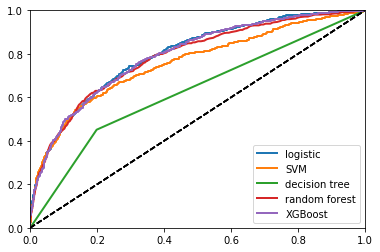

In [75]:
plot_roc_curve(Ytrain, y_score_lg, 'logistic')
plot_roc_curve(Ytrain, y_score_svm, 'SVM')
plot_roc_curve(Ytrain, y_score_tree, 'decision tree')
plot_roc_curve(Ytrain, y_score_rf,  'random forest')
plot_roc_curve(Ytrain, y_score_xgb,  'XGBoost')